# **Cyclistic Case Study**

### About the Company
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime. - Google Data Amalytics Professional Certificate

### Services Offered:
- Single-Ride Passes
- Full-Day Passes
- Annual Memberships

### Customer Segment:
- Customers who purchase single-ride or full-day passes are referred to as casual riders.
- Customers who purchase annual memberships are Cyclistic members.

### Finance Analysts Speculation
- Annual members are much more profitable than casual riders.
- According to Moreno, the company's director of marketing, maximizing the number of annual members will be key to the company's future success.

### Notes from Moreno
- Rather than creating a marketing campaign that targets all-new customers, the company should focus on converting casual riders into annual members.
- Casual riders are already aware of the company's program and have chosen Cyclistic for their mobility needs.

# Case Study Deliverables:
- A clear statement of the business task
- A description of all data sources used
- Documentation of any cleaning or manipulation of data
- A summary of analysis
- Supporting visualizations and key findings
- Top 3 Recommendations based on analysis

# **Question to be Answered: How do annual members and casual riders use Cyclistic bikes differently?**

# **Ask Phase**

| **Guiding Questions**                         |              **Answers** |
|-------------------------------------------|:--------------------:|
| What is the problem I am trying to solve? |   Profit maximization for Cyclistic by turning casual riders into annual members   |
| How can my insights drive business decisions?      |  Understanding the difference between the riding patterns of Cyclistic's customer audience could potentially lead to actionable steps and drive marketing campaigns that easily converts casual riders into annual members |

### Deliverable: Concise and Clear Statement of the Business Task
**_Analyze and vary the bike usage patterns for both casual riders and annual members._** 

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


# **Prepare Phase**

| **Guiding Questions**                         |              **Answers** |
|-------------------------------------------|:--------------------:|
| Where is the data located? |   The riding data has been provided by Motivate International Inc. and is stored on Amazon Web Service (AWS); a reputable cloud provider.   |
| How is the data organized?     | <ol><li> Comma Separated Files </li><li>Proper naming convention followed except for the case of September 2022</li><li>All data files have the same number of columns and all column names are exactly the same.</li><li>All columns are of the right data types.</li></ol> |
| Are there issues with bias or credibility in the data?     | <ol><li>The data being used for analysis is time-relevant as it is of the immediate past 12 months.</li><li>The data is from a primary source as it was collected in real-time by the company itself using their app.</li><li>There is not much information on how exactly the data were extracted. Hence, it is difficult to comment on whether there is bias in the data collection process.</li><li>The percentage of missing data in each dataframe is generally low, with most columns having a fraction of 0.0% indicating that the data is quite complete. However, columns like **_start\_station\_name_**, **_start\_station\_id_**,  **_end\_station\_name_**, **_end\_station\_id_** have percentages of their missing data ranging from about 13% to 17%. </li><li>The data entry format in some of the columns like **_station\_id_** is not uniform throughout.</li></ol> |
| How are components like licensing, privacy, security, and accessibility addressed?    |  <ol><li> The data is licensed under the Divvy company via this [link](https://www.divvybikes.com/data-license-agreement) but cannot be accessed because the server is down and hence, raises a concern. </li> <li> The data is opensource, hence publicly accessible to anyone that might require it. </li><li>Due to privacy issues, the riders' id information have been altered to protect against the possible connection between pass purchases and credit card numbers.</li><li>Copies of the original data files have been made for security purposes and the original files have been stored online using OneDrive.</li></ol> |

### Inspecting the Data

In [1]:
import pandas as pd

#### Loading all the Data

In [7]:
import os
# check current working directory
os.getcwd()

'c:\\Users\\Alli Ajagbe\\OneDrive - Plaksha University\\Desktop\\Data Analytics\\case_study'

In [2]:
june2023 = pd.read_csv("../../divvy-data/202306-divvy-tripdata.csv")
may2023 = pd.read_csv("../../divvy-data/202305-divvy-tripdata.csv")
april2023 = pd.read_csv("../../divvy-data/202304-divvy-tripdata.csv")
march2023 = pd.read_csv("../../divvy-data/202303-divvy-tripdata.csv")
february2023 = pd.read_csv("../../divvy-data/202302-divvy-tripdata.csv")
january2023 = pd.read_csv("../../divvy-data/202301-divvy-tripdata.csv")
december2022 = pd.read_csv("../../divvy-data/202212-divvy-tripdata.csv")
november2022 = pd.read_csv("../../divvy-data/202211-divvy-tripdata.csv")
october2022 = pd.read_csv("../../divvy-data/202210-divvy-tripdata.csv")
september2022 = pd.read_csv("../../divvy-data/202209-divvy-publictripdata.csv")
august2022 = pd.read_csv("../../divvy-data/202208-divvy-tripdata.csv")
july2022 = pd.read_csv("../../divvy-data/202207-divvy-tripdata.csv")

#### Columns Check

In [3]:
# asserting that all files have the same columns
all_dfs = [june2023, may2023, april2023, march2023, february2023, january2023, december2022, november2022, october2022, september2022, august2022, july2022]
df = all_dfs[0]
assert all([all(df.columns == df2.columns) for df2 in all_dfs])
print('All files have the same columns.')

All files have the same columns.


In [4]:
# printing the types of the columns
print(june2023.dtypes)

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object


### Deliverable: A description of all data sources used.

**_The data sources used in this analysis consist of riding data provided by Motivate International Inc., a renowned bike-sharing services company. The data is securely stored on Amazon Web Service (AWS), a reputable and reliable cloud provider, ensuring accessibility and data integrity. The dataset is organized in comma-separated files with consistent naming conventions, except for September 2022. Each file contains the same number of columns with consistent names and appropriate data types, ensuring the data's coherence and structure. However, the analysis raises concerns about potential bias due to limited information on the data extraction process. On the positive side, the data represents the past 12 months and is collected in real-time through the company's app, bolstering its credibility and relevance. Nevertheless, the presence of missing values in the dataset may impact the accuracy of the resulting analysis. Additionally, privacy concerns have been addressed by altering riders' ID information to safeguard their identity and protect sensitive data. The data is licensed under Divvy, the bike-sharing company, and although the data is generally open-source, there are challenges related to its current accessibility due to server issues. For security purposes, copies of the original data files have been securely stored online using OneDrive._**

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **Process Phase**

## Analysis Log
- Converted the started_at and ended_at columns to datetime for all the month dataframes
- Calculated ride length for each ride in all dataframes
- Added columns for days of the week for all dataframes
- Checked the missing values in the dataframes
- Computed the fraction of missing data points for all columns in all dataframes to assess the quality of the data
- Added month name columns to all dataframes
- Calculated distances in kilometres between the start and end stations for all dataframes using the haversine formula
- Renamed ride_length column to ride_length_seconds and ride_distance to ride_distance_km in all dataframes for easy understanding

In [5]:
# converting started_at and ended_at to datetime for all dataframes
for dataframe in all_dfs:
    dataframe['started_at'] = pd.to_datetime(dataframe['started_at'])
    dataframe['ended_at'] = pd.to_datetime(dataframe['ended_at'])

In [7]:
# calculating ride length for each ride in all the dataframes
for dataframe in all_dfs:
    dataframe['ride_length'] = dataframe['ended_at'] - dataframe['started_at']
    # converting ride length to seconds
    dataframe['ride_length'] = dataframe['ride_length'].astype('timedelta64[s]')

In [8]:
# verifying our changes
june2023.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,6F1682AC40EB6F71,electric_bike,2023-06-05 13:34:12,2023-06-05 14:31:56,NaN,NaN,NaN,NaN,41.91,-87.69,41.91,-87.70,member,3464.0
1,622A1686D64948EB,electric_bike,2023-06-05 01:30:22,2023-06-05 01:33:06,NaN,NaN,NaN,NaN,41.94,-87.65,41.94,-87.65,member,164.0
2,3C88859D926253B4,electric_bike,2023-06-20 18:15:49,2023-06-20 18:32:05,NaN,NaN,NaN,NaN,41.95,-87.68,41.92,-87.63,member,976.0
3,EAD8A5E0259DEC88,electric_bike,2023-06-19 14:56:00,2023-06-19 15:00:35,NaN,NaN,NaN,NaN,41.99,-87.65,41.98,-87.66,member,275.0
4,5A36F21930D6A55C,electric_bike,2023-06-19 15:03:34,2023-06-19 15:07:16,NaN,NaN,NaN,NaN,41.98,-87.66,41.99,-87.65,member,222.0


In [10]:
# creating a column for day of the week
for dataframe in all_dfs:
    dataframe['day_of_week'] = dataframe['started_at'].dt.day_name()

In [11]:
# verifying our changes
may2023.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,0D9FA920C3062031,electric_bike,2023-05-07 19:53:48,2023-05-07 19:58:32,Southport Ave & Belmont Ave,13229,NaN,NaN,41.939408,-87.663831,41.930000,-87.650000,member,284.0,Sunday
1,92485E5FB5888ACD,electric_bike,2023-05-06 18:54:08,2023-05-06 19:03:35,Southport Ave & Belmont Ave,13229,NaN,NaN,41.939482,-87.663848,41.940000,-87.690000,member,567.0,Saturday
2,FB144B3FC8300187,electric_bike,2023-05-21 00:40:21,2023-05-21 00:44:36,Halsted St & 21st St,13162,NaN,NaN,41.853793,-87.646719,41.860000,-87.650000,member,255.0,Sunday
3,DDEB93BC2CE9AA77,classic_bike,2023-05-10 16:47:01,2023-05-10 16:59:52,Carpenter St & Huron St,13196,Damen Ave & Cortland St,13133,41.894556,-87.653449,41.915983,-87.677335,member,771.0,Wednesday
4,C07B70172FC92F59,classic_bike,2023-05-09 18:30:34,2023-05-09 18:39:28,Southport Ave & Clark St,TA1308000047,Southport Ave & Belmont Ave,13229,41.957081,-87.664199,41.939478,-87.663748,member,534.0,Tuesday


In [16]:
# checking the number of missing values in each column for all dataframes
i = 0
for dataframe in all_dfs:
    print(f"Dataframe {i}")
    for column in dataframe.columns:
        print(f"{column} : {dataframe[column].isnull().sum()}, fraction: {dataframe[column].isnull().sum()/len(dataframe[column])*100}%")
    print("\n")
    i += 1

Dataframe 0
ride_id : 0, fraction: 0.0%
rideable_type : 0, fraction: 0.0%
started_at : 0, fraction: 0.0%
ended_at : 0, fraction: 0.0%
start_station_name : 116259, fraction: 16.155654805744156%
start_station_id : 116259, fraction: 16.155654805744156%
end_station_name : 124050, fraction: 17.238312549158024%
end_station_id : 124050, fraction: 17.238312549158024%
start_lat : 0, fraction: 0.0%
start_lng : 0, fraction: 0.0%
end_lat : 889, fraction: 0.1235377658702256%
end_lng : 889, fraction: 0.1235377658702256%
member_casual : 0, fraction: 0.0%
ride_length : 0, fraction: 0.0%
day_of_week : 0, fraction: 0.0%


Dataframe 1
ride_id : 0, fraction: 0.0%
rideable_type : 0, fraction: 0.0%
started_at : 0, fraction: 0.0%
ended_at : 0, fraction: 0.0%
start_station_name : 89240, fraction: 14.754632316348312%
start_station_id : 89240, fraction: 14.754632316348312%
end_station_name : 95267, fraction: 15.751115608264843%
end_station_id : 95267, fraction: 15.751115608264843%
start_lat : 0, fraction: 0.0%


In [22]:
# creating a column for month name
for dataframe in all_dfs:
    dataframe['month'] = dataframe['started_at'].dt.month_name(locale = 'English')

In [23]:
# verifying the changes
may2023.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,month
0,0D9FA920C3062031,electric_bike,2023-05-07 19:53:48,2023-05-07 19:58:32,Southport Ave & Belmont Ave,13229,NaN,NaN,41.939408,-87.663831,41.930000,-87.650000,member,284.0,Sunday,May
1,92485E5FB5888ACD,electric_bike,2023-05-06 18:54:08,2023-05-06 19:03:35,Southport Ave & Belmont Ave,13229,NaN,NaN,41.939482,-87.663848,41.940000,-87.690000,member,567.0,Saturday,May
2,FB144B3FC8300187,electric_bike,2023-05-21 00:40:21,2023-05-21 00:44:36,Halsted St & 21st St,13162,NaN,NaN,41.853793,-87.646719,41.860000,-87.650000,member,255.0,Sunday,May
3,DDEB93BC2CE9AA77,classic_bike,2023-05-10 16:47:01,2023-05-10 16:59:52,Carpenter St & Huron St,13196,Damen Ave & Cortland St,13133,41.894556,-87.653449,41.915983,-87.677335,member,771.0,Wednesday,May
4,C07B70172FC92F59,classic_bike,2023-05-09 18:30:34,2023-05-09 18:39:28,Southport Ave & Clark St,TA1308000047,Southport Ave & Belmont Ave,13229,41.957081,-87.664199,41.939478,-87.663748,member,534.0,Tuesday,May


In [25]:
# computing the distance
import math
def haversine_distance(row):

    # converting latitude and longitude from degrees into radians
    start_lan, start_lng, end_lat, end_lng = row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']

    # haversine formula
    d_lat = end_lat - start_lan
    d_lng = end_lng - start_lng

    a = math.sin(d_lat/2)**2 + math.cos(start_lan) * math.cos(end_lat) * math.sin(d_lng/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    # Radius of earth in kilometers is 6371
    r = 6371
    distance = r * c
    return distance

# applying the function to the dataframe
for dataframe in all_dfs:
    dataframe['ride_distance'] = dataframe.apply(haversine_distance, axis=1)

In [26]:
# verifying changes
april2023.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,month,ride_distance
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02 08:37:28,2023-04-02 08:41:37,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.60,member,249.0,Sunday,April,63.710000
1,34E4ED3ADF1D821B,electric_bike,2023-04-19 11:29:02,2023-04-19 11:52:12,NaN,NaN,NaN,NaN,41.87,-87.65,41.93,-87.68,member,1390.0,Wednesday,April,393.506314
2,5296BF07A2F77CB5,electric_bike,2023-04-19 08:41:22,2023-04-19 08:43:22,NaN,NaN,NaN,NaN,41.93,-87.66,41.93,-87.66,member,120.0,Wednesday,April,0.000000
3,40759916B76D5D52,electric_bike,2023-04-19 13:31:30,2023-04-19 13:35:09,NaN,NaN,NaN,NaN,41.92,-87.65,41.91,-87.65,member,219.0,Wednesday,April,63.710000
4,77A96F460101AC63,electric_bike,2023-04-19 12:05:36,2023-04-19 12:10:26,NaN,NaN,NaN,NaN,41.91,-87.65,41.91,-87.63,member,290.0,Wednesday,April,61.255373


In [29]:
# renaming the columns of all the dataframes
for dataframe in all_dfs:
    dataframe.rename(columns={'ride_length': 'ride_length_seconds', 'ride_distance': 'ride_distance_km'}, inplace=True)

In [30]:
# verifying changes
august2022.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_seconds,day_of_week,month,ride_distance_km
0,550CF7EFEAE0C618,electric_bike,2022-08-07 21:34:15,2022-08-07 21:41:46,NaN,NaN,NaN,NaN,41.93,-87.69,41.94,-87.72,casual,451.0,Sunday,August,108.365437
1,DAD198F405F9C5F5,electric_bike,2022-08-08 14:39:21,2022-08-08 14:53:23,NaN,NaN,NaN,NaN,41.89,-87.64,41.92,-87.64,casual,842.0,Monday,August,191.130000
2,E6F2BC47B65CB7FD,electric_bike,2022-08-08 15:29:50,2022-08-08 15:40:34,NaN,NaN,NaN,NaN,41.97,-87.69,41.97,-87.66,casual,644.0,Monday,August,81.666745
3,F597830181C2E13C,electric_bike,2022-08-08 02:43:50,2022-08-08 02:58:53,NaN,NaN,NaN,NaN,41.94,-87.65,41.97,-87.69,casual,903.0,Monday,August,221.666372
4,0CE689BB4E313E8D,electric_bike,2022-08-07 20:24:06,2022-08-07 20:29:58,NaN,NaN,NaN,NaN,41.85,-87.65,41.84,-87.66,casual,352.0,Sunday,August,72.304718


In [31]:
!pip install folium

                                              0.0/102.3 kB ? eta -:--:--
     -------------------------------------- 102.3/102.3 kB 3.0 MB/s eta 0:00:00


### Visualization the longitudes and latitudes of the stations

In [34]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

NameError: name 'cfeature' is not defined

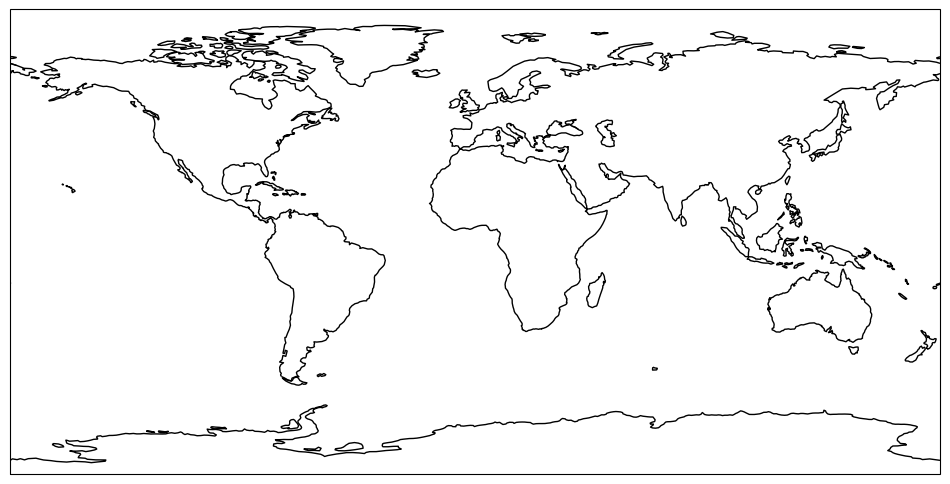

In [36]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()
# adding land
ax.add_feature(cfeature.LAND)

ax.scatter(may2023['start_lng'], may2023['start_lat'], marker = 'o', label="Start Points", color='red')
ax.scatter(may2023['end_lng'], may2023['end_lat'], marker = 'o', label="End Points", color='blue')

plt.legend()
plt.title('Start and End Points of Trips in May 2023')
plt.show()